In [2]:
# Notebook to slim the production files for the LPR
import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import dask.dataframe as dd

import re


In [9]:
# ddf = dd.read_hdf(os.path.join("../../../../Google Drive/My Drive/Data/ATPC/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
ddf = dd.read_hdf(os.path.join("../data/ATPC_gamma/", 'ATPC_gamma_714298_0.h5'), key = 'hits')
hits = ddf.compute()
display(hits)

event_hits = hits[hits.event_id == 100319]

,event_id,x,y,z,energy
0,100000,-335.0,-1045.0,3555.0,0.000050
1,100000,-415.0,-1055.0,3565.0,0.000025
2,100000,-395.0,-1055.0,3565.0,0.000025
3,100000,-385.0,-1045.0,3565.0,0.000025
4,100000,-375.0,-1055.0,3565.0,0.000050
...,...,...,...,...,...
858890,100319,-1095.0,1225.0,5115.0,0.000125
858891,100319,-1095.0,1235.0,5115.0,0.000200
858892,100319,-1085.0,1205.0,5115.0,0.000025
858893,100319,-1075.0,1195.0,5115.0,0.000050


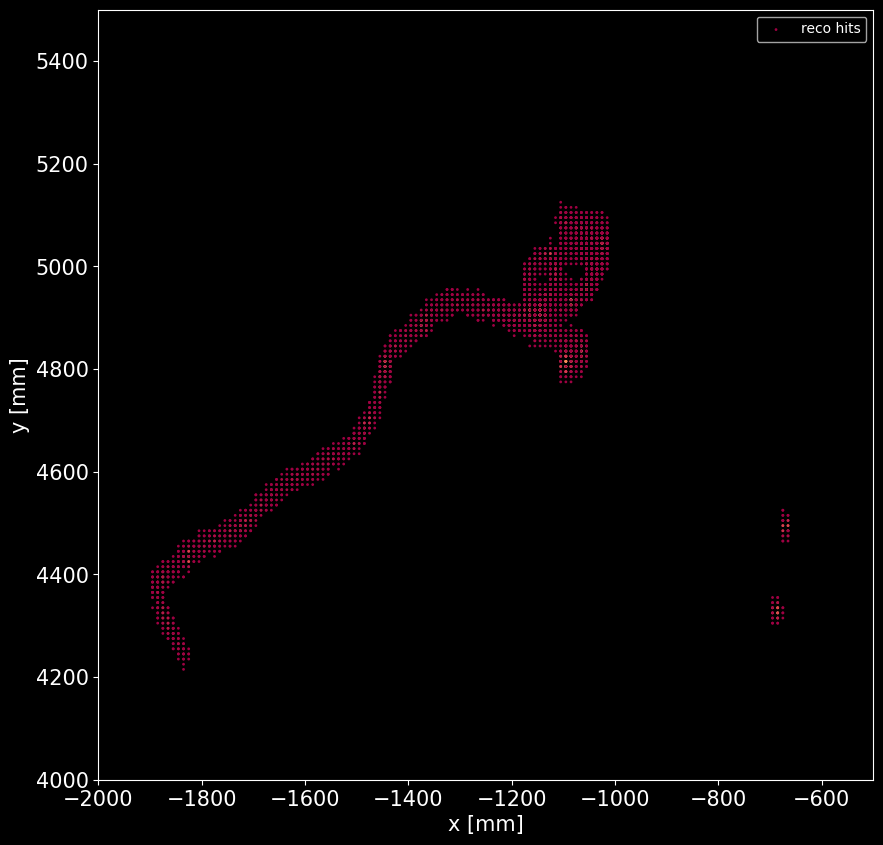

In [11]:
%matplotlib inline



# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111)

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
# ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
# ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

ax.set_xlim(-2000, -500)
ax.set_ylim(4000, 5500)
# ax.set_ylim(1500, 3000)

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

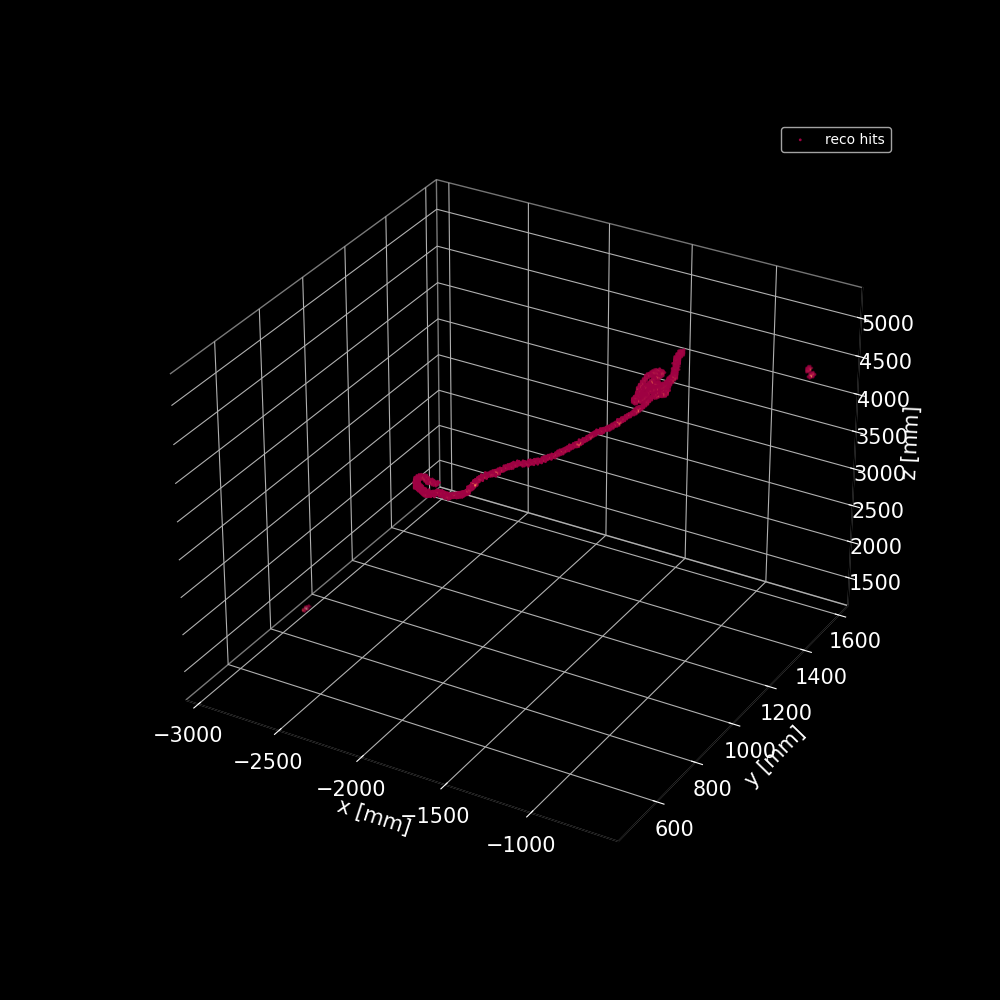

In [12]:
%matplotlib widget



# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
# ax.scatter(df.x, df.y,  df.z,c= df.energy, cmap='Spectral', s=0.1, label = "reco hits")
ax.scatter(event_hits.x, event_hits.y,  event_hits.z,c= event_hits.energy, cmap='Spectral', s=1, label = "reco hits")

ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.set_xlim(-100, 400)
# ax.set_ylim(0, 1000)
# ax.set_zlim(1500, 3000)


legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

,hitid,x,y,z,energy
0,0,-0.393467,0.156311,0.075463,0.001437
1,1,-1.336009,0.398322,0.273506,0.004514
2,2,-2.272480,0.664253,0.469556,0.003761
3,3,-3.206938,0.934457,0.669249,0.006476
4,4,-4.152037,1.217186,0.782751,0.003881
...,...,...,...,...,...
358,358,39.611788,-43.281654,-37.728450,0.003311
359,359,39.577772,-43.322303,-37.784299,0.008521
360,360,39.595052,-43.295738,-37.749939,0.008451
361,361,39.599020,-43.299823,-37.727668,0.010461


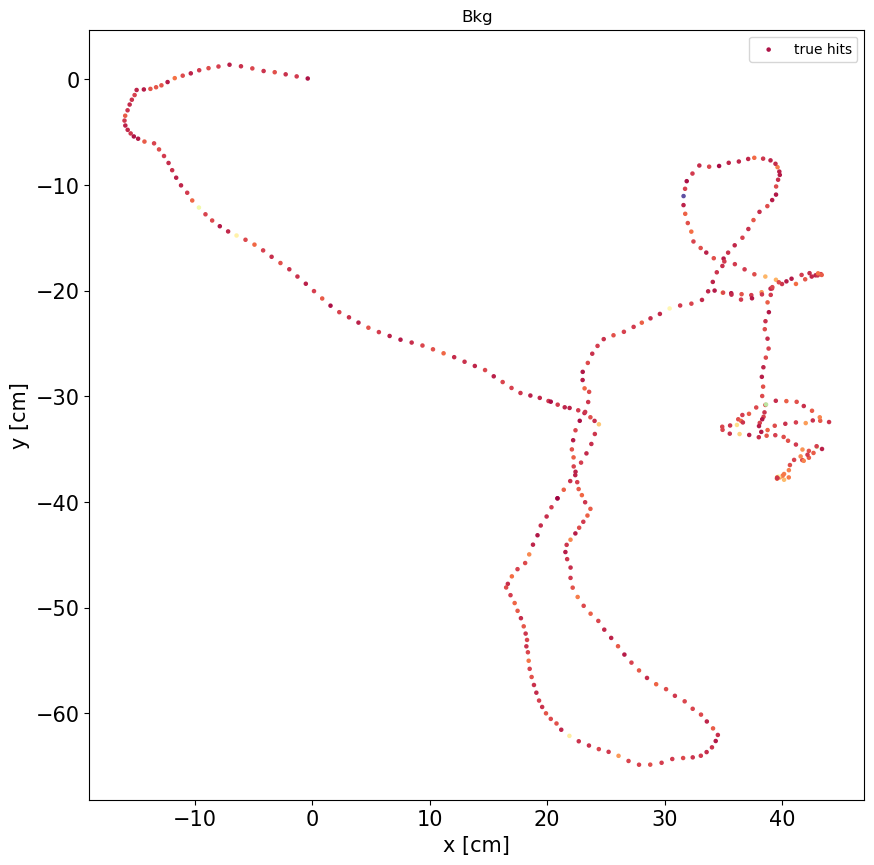

In [30]:
# Load in a file from Adam Para and see what it looks like for signal and background

signal = pd.read_csv("../../ML/data/Para/Data/single_electron/mctruehits_trk_1161.dat", sep=' ', header=None, names=["hitid", "x", "y", "z", "energy"])
%matplotlib inline



# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111)

# fig.set_facecolor('black')
# ax.set_facecolor('black')
ax.scatter(signal.x, signal.z,c= signal.energy, cmap='Spectral', s=5, label = "true hits")

ax.set_xlabel("x [cm]", fontsize = 15)
ax.set_ylabel("y [cm]", fontsize = 15)
# ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
# ax.xaxis.label.set_color('white')
# ax.yaxis.label.set_color('white')
# # ax.zaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')

# Remove background (axis)
# ax.xaxis.pane.fill = False
# ax.yaxis.pane.fill = False
# ax.zaxis.pane.fill = False

# ax.set_xlim(-2000, -500)
# ax.set_ylim(3500, 5500)
# ax.set_ylim(1500, 3000)

legend = plt.legend()

# Set the text color of the legend
# for text in legend.get_texts():
#     text.set_color('white')  # Set the text color to red

plt.title("Bkg")

display(signal)